# Contar vazios mês (cvm)

In [1]:
! python3 -m pip install unidecode

In [1]:
import sys
import os
from os.path import join
from os import listdir as ld
sys.path.append(join('/',*os.getcwd().split('/')[:-1], 'lib'))

In [2]:
%matplotlib inline
import pandas as pd
import of_proc
import mainlib
from os import listdir as ld
from mainlib import dframe,fasorial
from matplotlib import pyplot as plt
from of_proc import pdump, pload, dk, daterange

Using TensorFlow backend.


l__________________________________________________________________________________________________________________________________________________

In [3]:
data = dframe().data
dp = dframe().dateparser

In [59]:
LISTA = '/home/ubuntu/data/data/maio_2019/setembro/lista-cad-pnt-20190820.csv'
LISTAF = '/home/ubuntu/data/data/maio_2019/setembro/lista-cad-pnt-20190820-faltantes.csv'

In [60]:
lcols = data['lista2']['columns']

In [100]:
lista1 = pd.read_csv(LISTA, names = lcols,index_col=[0],parse_dates=['data_inicio','data_fim',4,5,6,7], date_parser =dp, skiprows=[0])
lista2 = pd.read_csv(LISTAF, names = lcols,index_col=[0],parse_dates=['data_inicio','data_fim',4,5,6,7], date_parser =dp, skiprows=[0])
lista = pd.concat( (lista1,lista2))

In [101]:
len(lista1), len(lista2), len(lista)

(1412, 100, 1512)

In [6]:
ddirs_fas = pload('../../pickles/ddirs_fas.pkl')

In [7]:
MM =   '/home/ubuntu/data/data/maio_2019/setembro/mm/csv/'

In [8]:
dim = pload('../../pickles/dim.pkl')

In [102]:
lista.head()

,instalacao,medidor,data_inicio,data_fim,lote,ssn,4,5,6,7,troca
cliente,,,,,,,,,,,
BTI400073539,BTI400073539,8548867,2018-04-25,2099-05-11,06*,"8,95511802260003E+019",2019-04-11,2019-05-13,2019-06-13,2019-07-11,1-Sem troca de medidor
BTI400077054,BTI400077054,8433819,2015-05-04,2099-09-01,18*,"8,95511804370003E+019",2019-04-29,2019-05-30,2019-06-29,2019-07-30,1-Sem troca de medidor
BTI400085863,BTI400085863,8550649,2019-06-26,2099-07-02,16*,"8,95511802260003E+019",2019-04-26,2019-05-28,2019-06-27,2019-07-26,2-Com troca de medidor
BTI400085863,BTI400085863,8027999,2014-10-30,2019-06-26,18*,NaN,2019-04-26,2019-05-28,2019-06-27,2019-07-26,2-Com troca de medidor
BTI400086150,BTI400086150,9756571,2019-08-12,2099-08-16,01*,"8,95511802260002E+019",2019-04-04,2019-05-06,2019-06-06,2019-07-04,2-Com troca de medidor


In [103]:
ii = [i for i in fasfal4 if i in list(lista.index) ]

In [105]:
len(ii)

92

In [107]:
ij = [i for i in fasfal4 if i in list(ddirs_fas.keys()) ]

In [109]:
len(ij)

92

l__________________________________________________________________________________________________________________________________________________

#### Leituras faltando - Fasorial

In [110]:
faso = fasorial()
erros = []
emp = {}
emp_porc = {}
faso=fasorial()
print(len(ddirs_fas))
for n,(k,v) in enumerate(ddirs_fas.items()):
    try:
        l = lista[[4,5,6,7]].loc[k]
        if type(l) == pd.Series:
            ddays = dict(l)        
        elif type(ddays) == pd.DataFrame:
            ddays = dict(l.groupby('cliente').first().iloc[0])
        else:
            print('Erro desconhecido: ', k)
        dff = pd.read_csv(v,sep=';',date_parser = dp,parse_dates=[5],names=data['fasorial']['columns'],index_col=5)
        faso.split_months(df=dff,ddays=ddays)
        emp[k] = {}
        emp_porc[k] = {}
        for y in faso.months.values():
            for number,dat in y.items():            
                new_df = dat.df.iloc[:,0].resample('15min').first()
                emp[k][number]=new_df.isna().sum()
                emp_porc[k][number]=new_df.isna().sum()/len(new_df)
        print('*&!@#--> ', n,k, emp[k][number])
    except Exception as e:
        print(e)
        erros.append(k)

1426
{4: Timestamp('2019-04-27 00:00:00'), 5: Timestamp('2019-05-29 00:00:00'), 6: Timestamp('2019-06-28 00:00:00'), 7: Timestamp('2019-07-29 00:00:00')}
*&!@#-->  0 BT2A400076589 45
{4: Timestamp('2019-04-24 00:00:00'), 5: Timestamp('2019-05-24 00:00:00'), 6: Timestamp('2019-06-25 00:00:00'), 7: Timestamp('2019-07-24 00:00:00')}
*&!@#-->  1 BT2A400085952 7
{4: Timestamp('2019-04-05 00:00:00'), 5: Timestamp('2019-05-07 00:00:00'), 6: Timestamp('2019-06-07 00:00:00'), 7: Timestamp('2019-07-05 00:00:00')}
*&!@#-->  2 BT2A400086240 12
{4: Timestamp('2019-04-29 00:00:00'), 5: Timestamp('2019-05-30 00:00:00'), 6: Timestamp('2019-06-29 00:00:00'), 7: Timestamp('2019-07-30 00:00:00')}
*&!@#-->  3 BT2A400091987 17
{4: Timestamp('2019-04-05 00:00:00'), 5: Timestamp('2019-05-07 00:00:00'), 6: Timestamp('2019-06-07 00:00:00'), 7: Timestamp('2019-07-05 00:00:00')}
*&!@#-->  4 BT2A400104752 15
{4: Timestamp('2019-04-05 00:00:00'), 5: Timestamp('2019-05-07 00:00:00'), 6: Timestamp('2019-06-07 00:00:

l__________________________________________________________________________________________________________________________________________________

In [33]:
fasfal5 = pload('../../pickles/fasfal5.pkl')

In [34]:
fasfal4 = fasfal5

In [39]:
ii = [i for i in fasfal4 if i in ddirs_fas.keys()]
len(ii)

In [111]:
len(erros), len(emp)

(26, 1425)

In [112]:
li = [i for i in fasfal4 if i in emp]

In [113]:
len(li), len(fasfal4)

(92, 92)

In [118]:
demp = pd.DataFrame(emp)

In [120]:
dempt = demp.T

In [121]:
len(emp), demp.shape

(1425, (3, 1425))

In [125]:
li2 = [i for i in fasfal4 if i in list(demp.columns)]

In [126]:
len(li2)

92

In [124]:
dempt.head()

,5,6,7
BT2A400076589,10.0,15.0,45.0
BT2A400085952,11.0,11.0,7.0
BT2A400086240,13.0,26.0,12.0
BT2A400091987,18.0,12.0,17.0
BT2A400104752,73.0,16.0,15.0


In [54]:
dempt[[*fasfal3]].T

,5,6,7
BTI411213516,21.0,17.0,NaN
BT2A430044984,NaN,NaN,2.0
BT2A414211457,63.0,11.0,NaN
BT2A412744882,NaN,NaN,2.0
BT2A414833048,225.0,16.0,NaN
BT2A413512843,NaN,17.0,44.0
BT2A413160639,7.0,NaN,NaN
BTI410461665,14.0,0.0,NaN
BTI410412319,19.0,18.0,NaN
BTI410360627,NaN,8.0,15.0


In [127]:
dempt.to_csv('../../outputs/fasoriais_empty.csv')

l__________________________________________________________________________________________________________________________________________________

In [47]:
demp=pd.DataFrame(index=emp.keys(), data=emp.values(),columns = [5,6,7])

In [57]:
#demp=demp.dropna().applymap(int)
demp.to_csv('../../outputs/fas_emp.csv')

In [31]:
demp_porc=pd.DataFrame(index=emp_porc.keys(), data=emp_porc.values(),columns = [5,6,7])
demp_porc=demp_porc.dropna(inplace=True, axis=0).applymap(int)
demp_porc2.to_csv('../../outputs/fas_emp_razão.csv')

AttributeError: 'NoneType' object has no attribute 'applymap'

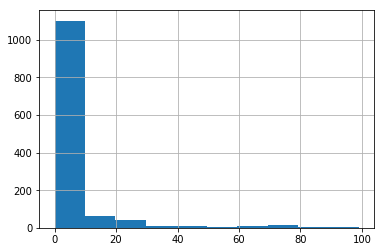

In [180]:
demp_porc2[5].hist()

## l_______________________________________________________________________

### Leituras faltando -  Memória de massa

In [9]:
from importlib import reload
reload(mainlib)
reload(of_proc)
from mainlib import fasorial, mm, dframe

m = mm()
df = dframe().dateparser

In [10]:
MM = '/home/ubuntu/data/data/maio_2019/setembro/mm/csv'

In [11]:
dmm = {}
for i in ld(MM):
    dmm[i] = pd.read_csv(join(MM,i), sep=';',decimal=',', low_memory=False, index_col = [0], na_values=' ',date_parser = df, parse_dates=[0])
    #dmm[i] = pd.read_csv(join(MM,i), sep=';',decimal=',', low_memory=False, index_col = [0], na_values=' ')
    print(dmm[i].index[dmm[i].shape[0]-1])
    dmm[i].drop(dmm[i].index[dmm[i].shape[0]-1],inplace=True)

NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT


In [12]:
n=0
for k,v in dmm.items():
    n+= v.shape[1]
    print(v.shape)
print(n)

(2952, 153)
(2952, 154)
(2952, 153)
(2952, 153)
(2952, 152)
(2952, 153)
(2952, 152)
(2952, 152)
(2952, 152)
(2952, 71)
1445


In [13]:
#Checar se os índices são os mesmos
for n,(k,v) in enumerate(dmm.items()):
    if n == 0:
        a1 = list(v.index)
        continue
    else:
        a2 = list(v.index)
    assert a1==a2

#####  Montar Dataframe coalizado

In [14]:
mm = pd.DataFrame()
for k,v in dmm.items():
    mm = pd.concat((mm,v),axis=1)

##### Checar vazios

## l_______________________________________________________________________

### Com troca

In [15]:
lista.set_index('medidor')

,instalacao,data_inicio,data_fim,lote,ssn,4,5,6,7,troca
medidor,,,,,,,,,,
8548867,BTI400073539,2018-04-25,2099-05-11,06*,"8,95511802260003E+019",2019-04-11,2019-05-13,2019-06-13,2019-07-11,1-Sem troca de medidor
8433819,BTI400077054,2015-05-04,2099-09-01,18*,"8,95511804370003E+019",2019-04-29,2019-05-30,2019-06-29,2019-07-30,1-Sem troca de medidor
8550649,BTI400085863,2019-06-26,2099-07-02,16*,"8,95511802260003E+019",2019-04-26,2019-05-28,2019-06-27,2019-07-26,2-Com troca de medidor
8027999,BTI400085863,2014-10-30,2019-06-26,18*,NaN,2019-04-26,2019-05-28,2019-06-27,2019-07-26,2-Com troca de medidor
9756571,BTI400086150,2019-08-12,2099-08-16,01*,"8,95511802260002E+019",2019-04-04,2019-05-06,2019-06-06,2019-07-04,2-Com troca de medidor
8025539,BTI400086150,2014-12-02,2019-08-11,01*,NaN,2019-04-04,2019-05-06,2019-06-06,2019-07-04,2-Com troca de medidor
8432330,BTI400086681,2015-06-15,2019-08-12,03*,NaN,2019-04-08,2019-05-08,2019-06-10,2019-07-08,2-Com troca de medidor
9756606,BTI400086681,2019-08-12,2099-08-14,03*,"8,95531012991336E+018",2019-04-08,2019-05-08,2019-06-10,2019-07-08,2-Com troca de medidor
8553177,BTI400091995,2019-05-09,2099-05-14,18*,"8,95511801370037E+019",2019-04-29,2019-05-30,2019-06-29,2019-07-30,2-Com troca de medidor


In [16]:
def get_daterange(lista): return lista.set_index('medidor')[['data_inicio','data_fim']].T.to_dict()

In [17]:
def multimed(dim):
    '''
    gets from dim, a dict with instalation that have more than one medidor
    '''
    mi1={}
    mi2={}
    erros = []
    for k,v in dim.items():
        if len(v)>1:
            #print(v)
            mi2[k] = v
        elif len(v) == 1:
            mi1[k] = v
        else:
            erros.append(k)
    return mi1, mi2, erros

In [18]:
def sort_by_daterange(dici):
    '''
    gets a dict whose values are tuples (initial date, end date)
    returns list of dict keys sorted by initial date
    '''
    idate2key = {v['data_inicio']:k for k,v in dici.items()}
    sk = sorted(idate2key.keys())
    sorted_keys = []
    for j in idate2key:
        sorted_keys.append(idate2key[j])
    return sorted_keys

In [19]:
def concat_mm(mm,dici,sorted_keys):
    '''
    input:
        mm:
            dataframe with mass memory
        dici:
            dict {mm: (initial date, end date)}
        sorted_keys:
            list [ dici keys sorted by initial date]
    '''
    insta_mm = pd.DataFrame()
    dici_output_mm = {}
    for nn in sorted_keys:
        strmed = '0'+str(nn)
        insta_mm = pd.concat((insta_mm, mm[strmed][dici[nn]['data_inicio']:dici[nn]['data_fim']]))
    return insta_mm

In [20]:
def count_null(dici_df_mm): return {k: v.iloc[:,0].isnull().sum() for k,v in dici_df_mm.items()}

In [26]:
def concat_multimed_mm(mm, lista, dim):
    mi1, mi2, _ =  multimed(dim)
    datmi = get_daterange(lista)
    dici_df_mm = {}
    erros=[]
    for i in mi2:
        med2dates = {m:datmi[int(m)] for m in mi2[i]}
        #print(a)
        sorted_keys = sort_by_daterange(med2dates)     
        try:
            dici_df_mm[i]=concat_mm(mm,med2dates,sorted_keys)
        except Exception as e:
            print(e)
            erros.append(i)
    dnull = count_null(dici_df_mm)
    return dici_df_mm,dnull,  erros
    

In [27]:
omi2, dnull2, erros2 = concat_multimed_mm(mm, lista, dim)

TypeError: object of type 'int' has no len()

------------

In [28]:
mm

,07266674,07266923,07267331,07267651,07311230,07311230.1,07329402,07516510,07516555,07581189,...,09444141,09444296,09444454,09444869,09575952,09576391,09736710,09756546,09756584,09756588
DATA/Hora,,,,,,,,,,,,,,,,,,,,,
2019-04-01 01:00:00,2.54,NaN,"0,31","0,34",NaN,NaN,"3,94","0,00",3.66,1.31,...,"3,40","0,21",3.28,0.20,3.77,NaN,NaN,NaN,NaN,NaN
2019-04-01 02:00:00,2.59,NaN,"0,36","0,36",NaN,NaN,"3,70","0,00",3.63,0.32,...,"3,56","0,21",3.07,0.30,3.84,NaN,NaN,NaN,NaN,NaN
2019-04-01 03:00:00,2.52,NaN,"0,34","0,36",NaN,NaN,"3,55","0,00",3.74,0.30,...,"3,72","0,20",3.00,0.22,3.83,NaN,NaN,NaN,NaN,NaN
2019-04-01 04:00:00,2.45,NaN,"0,34","0,34",NaN,NaN,"3,48","0,00",3.71,0.30,...,"3,37","0,21",2.94,0.20,3.84,NaN,NaN,NaN,NaN,NaN
2019-04-01 05:00:00,3.70,NaN,"0,36","0,36",NaN,NaN,"3,55","0,00",3.68,0.30,...,"3,39","0,21",2.84,0.21,3.80,NaN,NaN,NaN,NaN,NaN
2019-04-01 06:00:00,5.78,NaN,"0,17","0,36",NaN,NaN,"3,79","0,00",11.22,0.30,...,"3,87","0,21",2.92,0.19,3.74,NaN,NaN,NaN,NaN,NaN
2019-04-01 07:00:00,3.79,NaN,"0,12","0,36",NaN,NaN,"4,56","0,00",13.01,1.90,...,"3,91","0,20",3.17,0.32,2.57,NaN,NaN,NaN,NaN,NaN
2019-04-01 08:00:00,3.26,NaN,"28,30","0,34",NaN,NaN,"5,69","0,00",18.21,3.58,...,"4,35","0,21",3.38,0.51,3.12,NaN,NaN,NaN,NaN,NaN
2019-04-01 09:00:00,5.28,NaN,"21,12","0,36",NaN,NaN,"4,87","0,00",24.30,5.34,...,"10,14","1,45",3.38,0.40,4.78,NaN,NaN,NaN,NaN,NaN


------------

### Sem troca

In [ ]:
dim2 = {}
for k,v in dim.items():
    if v!=['MEDIDOR']:
        dim2[k] = v

In [23]:
mi1, mi2, _ =  multimed(dim2)

NameError: name 'dim2' is not defined

In [24]:
med1 = ['0' + i[0] for i in mi1.values()]

NameError: name 'mi1' is not defined

In [25]:
mst = mm[med1]

NameError: name 'med1' is not defined

In [40]:
mst.isnull().sum().to_dict()

{'09103517': 22,
 '08908634': 22,
 '09103462': 22,
 '09103922': 0,
 '09134628': 0,
 '09120694': 0,
 '09308599': 0,
 '09225158': 22,
 '09118889': 1525,
 '09118361': 166,
 '09103712': 0,
 '09018790': 0,
 '09120480': 44,
 '09222784': 153,
 '09103525': 22,
 '09443008': 46,
 '09103913': 0,
 '09444406': 22,
 '09444495': 0,
 '09223103': 0,
 '09442618': 22,
 '09443922': 976,
 '09018882': 21,
 '09117986': 0,
 '09441685': 0,
 '09117575': 21,
 '09135640': 0,
 '09118498': 0,
 '09224683': 21,
 '09444141': 21,
 '09576264': 21,
 '09134929': 117,
 '09135244': 21,
 '08907983': 21,
 '08908250': 21,
 '09135138': 0,
 '08908316': 42,
 '09019177': 0,
 '09018918': 21,
 '09224943': 21,
 '09103567': 1778,
 '09136011': 1020,
 '09104032': 42,
 '09120383': 42,
 '09222196': 610,
 '09444993': 22,
 '09441801': 0,
 '09443783': 42,
 '09117611': 42,
 '09441670': 0,
 '09104373': 114,
 '08909203': 21,
 '09137021': 94,
 '09223999': 21,
 '09118179': 42,
 '08908267': 21,
 '09119802': 90,
 '09442378': 42,
 '09118784': 0,
 '0

### Separar por meses

In [41]:
dmi = pload('../../pickles/dmi.pkl')

##### Trocar medidor por instalação no dataframe

In [42]:
icols = [dmi[str(int(m))] for m in mst.columns]
len(icols), len(mst.columns)
mst.columns = icols

##### Criar lista aumentada para dias de leitura

In [43]:
ldl = lista[[4,5,6,7]].T.to_dict()
ldl2={}
for k,v in ldl.items():
    ldl2[k] = [pd.Timestamp('1900-01-01'), v[4], v[5], v[6], v[7], pd.Timestamp('2100-12-31')]

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [44]:
dmst = mst.to_dict()

##### Dicionário de dataframes com troca

In [47]:
omi3 = omi2.copy()
for k,v in omi3.items():
    omi3[k] = v.sort_index(ascending=True)

##### DataFrame sem troca

In [45]:
dfst = {} 
for n,(k,v) in enumerate(dmst.items()):
    print(n,end=' ')
    dfst[k] = pd.DataFrame(index = v.keys(), data = v.values())

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [48]:
dl={}
for i in dim:
    if i in omi3:        
        dl[i] = {}
        for n,d in enumerate(ldl2[i][1:]):
            #print( max(pd.to_datetime(ldl2[i][n].date()), omi2[i].index[0]) ,'====', min(pd.to_datetime(ldl2[i][n+1]), omi2[i].index[-1]))
            try:
                dl[i][n] = omi3[i][max(pd.to_datetime(ldl2[i][n].date()), pd.to_datetime(omi2[i].index[0])) : min(pd.to_datetime(ldl2[i][n+1]), pd.to_datetime(omi2[i].index[-1]))]
            except Exception as e:
                print(e)
            #dl[i][n] = omi2[i][  pd.to_datetime(ldl2[i][n+1]):pd.to_datetime(ldl2[i][n])]
    elif i in dfst:
        dl[i] = {}
        for n,d in enumerate(ldl2[i][1:]):
            try:
                #print(dmst[i])
                print(max(pd.to_datetime(ldl2[i][n].date()), pd.to_datetime(dfst[i].index[0])))
                print(min(pd.to_datetime(ldl2[i][n+1]), pd.to_datetime(dfst[i].index[-1])))
                dl[i][n] = 's'
                dl[i][n] = dfst[i].loc[max(pd.to_datetime(ldl2[i][n].date()), pd.to_datetime(dfst[i].index[0])) : min(pd.to_datetime(ldl2[i][n+1]), pd.to_datetime(dfst[i].index[-1])),:]
            except Exception as e:
                print('--->', e)

2019-04-01 01:00:00
2019-04-27 00:00:00
2019-04-27 00:00:00
2019-05-29 00:00:00
2019-05-29 00:00:00
2019-06-28 00:00:00
2019-06-28 00:00:00
2019-07-29 00:00:00
2019-07-29 00:00:00
2019-08-02 00:00:00
2019-04-01 01:00:00
2019-04-24 00:00:00
2019-04-24 00:00:00
2019-05-24 00:00:00
2019-05-24 00:00:00
2019-06-25 00:00:00
2019-06-25 00:00:00
2019-07-24 00:00:00
2019-07-24 00:00:00
2019-08-02 00:00:00
2019-04-01 01:00:00
2019-04-05 00:00:00
2019-04-05 00:00:00
2019-05-07 00:00:00
2019-05-07 00:00:00
2019-06-07 00:00:00
2019-06-07 00:00:00
2019-07-05 00:00:00
2019-07-05 00:00:00
2019-08-02 00:00:00
2019-04-01 01:00:00
2019-04-29 00:00:00
2019-04-29 00:00:00
2019-05-30 00:00:00
2019-05-30 00:00:00
2019-06-29 00:00:00
2019-06-29 00:00:00
2019-07-30 00:00:00
2019-07-30 00:00:00
2019-08-02 00:00:00
2019-04-01 01:00:00
2019-04-05 00:00:00
2019-04-05 00:00:00
2019-05-07 00:00:00
2019-05-07 00:00:00
2019-06-07 00:00:00
2019-06-07 00:00:00
2019-07-05 00:00:00
2019-07-05 00:00:00
2019-08-02 00:00:00


In [164]:
tnull = {}
for k,v in dl.items():
    tnull[k] = {}
    for k1, v1 in v.items():
        tnull[k][k1]= v1.iloc[:,0].isnull().sum()

In [168]:
out_df = pd.DataFrame(tnull).T

## l_______________________________________________________________________

#### De cinco em cindo dias

In [133]:
tnull = {}
for n,(k,v) in enumerate(dl.items()):
    tnull[k] = {}
    for k1, v1 in v.items():
        tnull[k][k1]= list(v1.resample('5d').apply(lambda x:  x.isnull().sum()).to_dict().values())[0]
        #a =  list(v1.resample('5d').apply(lambda x:  x.isnull().sum()).to_dict().values())[0]

In [134]:
x2 = {}
for k,v in tnull.items():
    x2[k] = {}
    for k1,v1 in v.items():
        for n,(k2, v2) in enumerate(v1.items()):
            x2[k][str(k1) + '_' + str(n)] = v2
     

In [136]:
x3 = pd.DataFrame(x2)

In [138]:
meses = {'0': 'Abril', '1':'Maio', '2':'Junho', '3':'Julho', '4':'Agosto', '5':'Setembro'}

In [156]:
cinquena = pd.Series(x3.index).apply(lambda x: x.split('_')[1]).values

In [151]:
mes = pd.Series(x3.index).apply(lambda x: meses[x.split('_')[0]]).values

In [154]:
x3.insert(loc=0, column='mes', value = mes)

In [157]:
x3.insert(loc=1, column='cinquena', value = cinquena)

In [162]:
x3.to_csv('../../outputs/mm_falta_5dias.csv')

## l_______________________________________________________________________